***
# Binomial test & Fisher's exact test
fet is almost the same with binom

In [1]:
import pandas as pd
import numpy as np

from geneutil import binom

dat = binom.Analysis(ref="enrichr",species="human")
# generate Analysis instance
# ref indicates a database for reference data: 'enrichr' or 'msigdb'
# species indicates a dictionary for converting data: 'human','mouse', or 'rat'

Reference database: Enrichr
--- all libraries currently available ---
- human
     ChEA_2016
     ENCODE_TF_ChIP-seq_2015
     GO_Biological_Process_2018
     GO_Cellular_Component_2018
     GO_Molecular_Function_2018
     Human_Gene_Atlas
     KEGG_2019_Human
     PPI_Hub_Proteins
     TRANSFAC_and_JASPAR_PWMs
- mouse
     KEGG_2019_Mouse
     Mouse_Gene_Atlas
-----------------------------------------
species='human'


In [2]:
dat.load_ref(library="GO_Biological_Process_2018",nmin=10)
# load reference data
# choose library from the above output
# nmin indicates the minimum number required for groups of genes
# may take a bit long

library='GO_Biological_Process_2018'
{'dict': {'database': 'BioMart', 'name': 'human'}, 'ref': {'database': 'enrichr', 'name': 'GO_Biological_Process_2018'}}


In [3]:
dat.check_ref("neutrophil")
# check the members of a group in the reference
# return the candidate group names if the keyword was not fully matched

!! Wrong keyword !!
perhaps: {'positive regulation of neutrophil migration (GO:1902624)', 'neutrophil activation involved in immune response (GO:0002283)', 'regulation of neutrophil chemotaxis (GO:0090022)', 'positive regulation of neutrophil chemotaxis (GO:0090023)', 'neutrophil degranulation (GO:0043312)', 'neutrophil extravasation (GO:0072672)', 'neutrophil activation (GO:0042119)', 'neutrophil mediated immunity (GO:0002446)', 'neutrophil migration (GO:1990266)', 'neutrophil chemotaxis (GO:0030593)'}


In [4]:
dat.check_ref('positive regulation of neutrophil chemotaxis (GO:0090023)')

positive regulation of neutrophil chemotaxis (GO:0090023): {'ccl21', 'cxcl6', 'xcl1', 'dapk2', 'ccr7', 'ripor2', 'ppbp', 'pf4v1', 'cxcl3', 'cxcl5', 'rac1', 'pf4', 'cxcl8', 'nckap1l', 'rac2', 'c1qbp', 'camk1d', 'tirap', 'mospd2', 'cxcl1', 'ccl19', 'cxcl2', 'thbs4', 'cd74'}


In [5]:
obj = {'camk1d','cxcl5','ripor2','ccl21','cxcl6','c1qbp','pf4v1','cxcl3','rac1'}
dat.calc(data=obj)
# a gene group of interest is given as a set
# both upper and lower cases are accepted

,p value,adjusted p value,overlap,hit No.,total No.
positive regulation of neutrophil chemotaxis (GO:0090023),8.582998e-21,2.171498e-18,"{cxcl6, cxcl3, ccl21, cxcl5, ripor2, camk1d, r...",9,24
positive regulation of neutrophil migration (GO:1902624),1.932916e-20,2.445139e-18,"{cxcl6, cxcl3, ccl21, cxcl5, ripor2, camk1d, r...",9,25
positive regulation of granulocyte chemotaxis (GO:0071624),4.199449e-20,3.541535e-18,"{cxcl6, cxcl3, ccl21, cxcl5, ripor2, camk1d, r...",9,26
regulation of neutrophil chemotaxis (GO:0090022),3.573558e-19,2.260275e-17,"{cxcl6, cxcl3, ccl21, cxcl5, ripor2, camk1d, r...",9,29
regulation of leukocyte chemotaxis (GO:0002688),1.209029e-09,6.117686e-08,"{cxcl6, cxcl3, cxcl5, pf4v1, camk1d}",5,30
...,...,...,...,...,...
negative regulation of transcription from RNA polymerase II promoter (GO:0000122),9.999999e-01,1.000000e+00,{c1qbp},1,565
regulation of cell proliferation (GO:0042127),1.000000e+00,1.000000e+00,"{cxcl6, cxcl3, cxcl5, pf4v1}",4,740
regulation of apoptotic process (GO:0042981),1.000000e+00,1.000000e+00,"{c1qbp, rac1}",2,815
"negative regulation of transcription, DNA-templated (GO:0045892)",1.000000e+00,1.000000e+00,{c1qbp},1,813


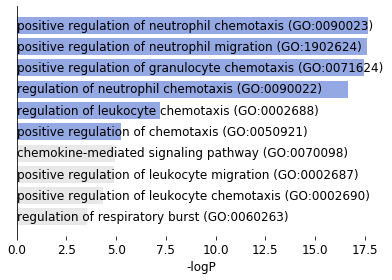

In [6]:
dat.plot(display_num=10,thresh=0.00001)
# display_num indicates the number of groups to be visualized
# thresh indicates the threshold for color discrimination